<a href="https://colab.research.google.com/github/ric-clemente/Crypto_Sentiment_vs_Price/blob/master/Crypto_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install twitterscraper==1.1
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

begin_date=dt.date(2017,11,1)
end_date=dt.date(2018,2,28)
#end_date=dt.date(2017,11,30)
#begin_date=dt.date(2019,6,1)
#end_date=dt.date(2019,8,16)
limit = 40000
lang = 'english'

tweets= query_tweets("btc or bitcoin",begindate=begin_date,enddate=end_date,limit=limit,lang=lang)
#fill dataframe with one row per object, one attribute per column
df=pd.DataFrame([t.__dict__ for t in tweets])




INFO: queries: ['btc or bitcoin since:2017-11-01 until:2017-11-06', 'btc or bitcoin since:2017-11-06 until:2017-11-12', 'btc or bitcoin since:2017-11-12 until:2017-11-18', 'btc or bitcoin since:2017-11-18 until:2017-11-24', 'btc or bitcoin since:2017-11-24 until:2017-11-30', 'btc or bitcoin since:2017-11-30 until:2017-12-06', 'btc or bitcoin since:2017-12-06 until:2017-12-12', 'btc or bitcoin since:2017-12-12 until:2017-12-18', 'btc or bitcoin since:2017-12-18 until:2017-12-24', 'btc or bitcoin since:2017-12-24 until:2017-12-30', 'btc or bitcoin since:2017-12-30 until:2018-01-05', 'btc or bitcoin since:2018-01-05 until:2018-01-11', 'btc or bitcoin since:2018-01-11 until:2018-01-17', 'btc or bitcoin since:2018-01-17 until:2018-01-23', 'btc or bitcoin since:2018-01-23 until:2018-01-29', 'btc or bitcoin since:2018-01-29 until:2018-02-04', 'btc or bitcoin since:2018-02-04 until:2018-02-10', 'btc or bitcoin since:2018-02-10 until:2018-02-16', 'btc or bitcoin since:2018-02-16 until:2018-02-2

In [0]:
df.head(15)


,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,AppliedThermalFluids,"<p class=""TweetTextSize js-tweet-text tweet-te...",934207083326533632,1,0,0,Make x10 or x20 of you initial investment. Joi...,2017-11-24 23:48:20,/appliedfluids/status/934207083326533632,appliedfluids
1,bitmex,"<p class=""TweetTextSize js-tweet-text tweet-te...",934206113968353280,0,0,0,"Use BTC or DASH to trade Forex, crypto, and mo...",2017-11-24 23:44:28,/bitmex2/status/934206113968353280,bitmex2
2,Elixium Capital,"<p class=""TweetTextSize js-tweet-text tweet-te...",934202508758614016,1,0,1,Are You Bullish Or Bearish On #Litecoin? Start...,2017-11-24 23:30:09,/ElixiumCapital/status/934202508758614016,ElixiumCapital
3,Elixium Capital,"<p class=""TweetTextSize js-tweet-text tweet-te...",934199990104330241,1,0,0,Are You Bullish Or Bearish On #Ethereum? Start...,2017-11-24 23:20:08,/ElixiumCapital/status/934199990104330241,ElixiumCapital
4,BigBlockers,"<p class=""TweetTextSize js-tweet-text tweet-te...",934198702411014149,0,0,0,The current price of Bitcoin is $8264.76.\nThe...,2017-11-24 23:15:01,/big_blockers/status/934198702411014149,big_blockers
5,Elliott Randall,"<p class=""TweetTextSize js-tweet-text tweet-te...",934198580369276928,53,3,12,100k new @coinbase customers/day. Only 1800 ne...,2017-11-24 23:14:32,/Elliott_Randall/status/934198580369276928,Elliott_Randall
6,© eM™®,"<p class=""TweetTextSize js-tweet-text tweet-te...",934195673657782272,2,0,0,wrong\nyou need to think harder\n\neven if sat...,2017-11-24 23:02:59,/eM_TMR/status/934195673657782272,eM_TMR
7,MediocreGenius,"<p class=""TweetTextSize js-tweet-text tweet-te...",934195159331250176,2,0,0,Kraken is one of the poorest examples of codin...,2017-11-24 23:00:57,/MediocreGenius_/status/934195159331250176,MediocreGenius_
8,Airdrop's Lab,"<p class=""TweetTextSize js-tweet-text tweet-te...",934189621071761409,0,0,0,https://www.youtube.com/watch?v=tr3KLCDAlnU … ...,2017-11-24 22:38:56,/AirdropsLab/status/934189621071761409,AirdropsLab
9,⚡️ Crypto Sweetie 👩‍🚀 🚀,"<p class=""TweetTextSize js-tweet-text tweet-te...",934186909781372930,0,0,0,Are You Bullish Or Bearish On #Oil? Start #Tra...,2017-11-24 22:28:10,/CryptoLootbox/status/934186909781372930,CryptoLootbox


In [0]:
#convert all text to lowercase
df['text'] = [str(i).lower() for i in df['text']] 
#remove pontuation
df["text"] = df['text'].str.replace('[^\w\s]','')
#remove white spaces
df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace('\d+', '', case=False)
df['text'] = df['text'].str.replace('#', '', case=False)
df['text'] = df['text'].str.replace('^RT[\s]+', '', case=False)
df['text'] = df['text'].str.replace('mon|monday|tue|tuesday|wed|wednsday|thur|thursday|fri|friday|sat|saturday|sun|sunday', '', case=False)
df['text'] = df['text'].str.replace('jan|january|fev|february|mar|march|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december', '', case=False)

import re
import string
#!pip install --user -U nltk

#df['text'] = df['text'].str.replace(r'\$\w*', '', case=False)
#df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
#remove stop words (“the”, “a”, “on”, “is”, “all”) and save the words in a list. Each position of the list contains the words of 1 tweet
def pre_proc_text(message_list):
  import nltk
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer
  from nltk.stem import WordNetLemmatizer

  

  
  #nltk.download('stopwords')
  #nltk.download('punkt')
  #nltk.download('wordnet')

  stop_words = set(stopwords.words('english'))
  result=['']*len(message_list)

  # Happy Emoticons
  emoticons_happy = set([
      ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
      ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
      '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
      'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
      '<3'
      ])

  # Sad Emoticons
  emoticons_sad = set([
      ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
      ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
      ':c', ':{', '>:\\', ';('
      ])

  # all emoticons (happy + sad)
  emoticons = emoticons_happy.union(emoticons_sad)
 


  for i in range(len(message_list)):
    

    tokens = word_tokenize(message_list[i])

    result[i]=[j for j in tokens if not j in stop_words]

    #result[i]=[j for j in tokens if not j in emoticons]

    stemmer= PorterStemmer()
    result[i]=[stemmer.stem(j) for j in result[i]] 

    lemmatizer=WordNetLemmatizer()  
    result[i]=[lemmatizer.lemmatize(j) for j in result[i]] 

    
  return result  

def clean_msg(m_list):
  
  df_m_list = pd.DataFrame.from_dict({'text':m_list})
  
  #print(df_m_list)
  df_m_list['text'] = [str(i).lower() for i in df_m_list['text']] 
  #remove pontuation
  df_m_list['text'] = df_m_list['text'].str.replace('[^\w\s]','')
  #remove white spaces
  df_m_list['text'] = df_m_list['text'].str.strip()
  df_m_list['text'] = df_m_list['text'].str.replace('http\S+|www.\S+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('\d+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('#', '', case=False) 
  df_m_list['text'] = df_m_list['text'].str.replace('^RT[\s]+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('mon|monday|tue|tuesday|wed|wednsday|thur|thursday|fri|friday|sat|saturday|sun|sunday', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('jan|january|fev|february|mar|march|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('@[A-Za-z0-9]+','', case=False)
  
  clean_m_list=pre_proc_text(df_m_list['text'])
  return clean_m_list


In [0]:
#words from the tweet number 1
clean_tweets=clean_msg(df['text'])
print(clean_tweets[26])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['bullish', 'bearish', 'silver', 'start', 'trade', 'slv', 'today', 'fast', 'secur', 'exchang', 'trade', 'leverag', 'earn', 'passiv', 'incom', 'auto', 'copi', 'trade', 'get', 'paid', 'share', 'trade', 'bitcoin', 'xbt', 'xbt', 'btc', 'cryptocurrencypictwittercompyigivxqgi']


In [0]:
from google.colab import files


def extract_words(file_name):
  try:
    file= open(file_name,"r",  encoding="ISO-8859-1")
  except:
    print(file_name)
    uploaded = files.upload()  
    file= open(file_name,"r",  encoding="ISO-8859-1")
  
  
  words=[]
  for line in file:

      
      if line[0]!=";" and line[0]!='\n':
        line=line.rstrip("\n")
        words.append(line)
        
  return words

#positive_words=[]
#negative_words=[]
#positive_words=extract_words('positive-words.txt')  
#negative_words=extract_words('negative-words.txt')  

#print("positive words\n",positive_words)
#print("negative words\n",negative_words)

In [0]:
positive_pol=[]
negative_pol=[]
positive_pol=extract_words('rt-polarity.pos')  
negative_pol=extract_words('rt-polarity.neg')  

print("positive words\n",positive_pol[:3])
print("negative words\n",negative_pol[:3])

positive words
 ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . ', 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . ', 'effective but too-tepid biopic']
negative words
 ['simplistic , silly and tedious . ', "it's so laddish and juvenile , only teenage boys could possibly find it funny . ", 'exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . ']


In [0]:

X=[]  
y=[]  
clean_pol_pos=clean_msg(positive_pol)
for i in range(len(clean_pol_pos)):
  y.append(1)
  
clean_pol_neg=clean_msg(negative_pol)
for i in range(len(clean_pol_neg)):
  y.append(-1)
print(clean_pol_pos[3])
print(clean_pol_neg[3])

#X = clean_pol_pos + clean_pol_neg

#print(X[3])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['sometim', 'like', 'go', 'movi', 'fun', 'wasabi', 'good', 'place', 'start']
['garbu', 'discard', 'potenti', 'patholog', 'studi', 'exhum', 'instead', 'ske', 'melodrama', 'circumstanti', 'situat']


In [0]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.naive_bayes import GaussianNB
import random
import numpy as np

def dic(list_words):
  vocab = []
  
  for i in range(len(list_words)):
      for w in list_words[i]:
        if w not in vocab:
          vocab.append(w)
      
  vocab = sorted(list(set(vocab)))
  return vocab
  #print(vocab[:10])
def count_words(vocab,list_words):  
  bag_vector = [[0]*len(vocab)]*len(list_words)  
  #print(bag_vector[0])
  for i in range(len(list_words)):   
      bag_vector[i]=np.zeros(len(vocab))
      #print(bag_vector[i])
      for w in list_words[i]:
          for j in range(len(vocab)):
              if vocab[j] == w: 
                bag_vector[i][j] = bag_vector[i][j] + 1 
     
                  
                  
      

  
  #print(bag_vector[:10])
  
  return bag_vector



In [0]:
dicionary_pol=dic(clean_pol_pos+ clean_pol_neg) 

X=count_words(dicionary_pol,clean_pol_pos+ clean_pol_neg)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()

print(len(X),len(y)) #para depois dar certo aqui

nr_random=random.randint(2,50)
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)

from sklearn.naive_bayes import MultinomialNB



model_pol = MultinomialNB()
#from sklearn.svm import SVC
#model_pol = SVC(kernel='linear', C=1E10)

#model_pol = Perceptron()
#model_pol = LinearSVR(random_state=0, tol=1e-5)
clf=model_pol.fit(X_train_pol,y_train_pol)
score_train = model_pol.score(X_train_pol, y_train_pol)
score_test = model_pol.score(X_test_pol, y_test_pol)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test_pol,y_test_pol)
print("total",score_total)

10662 10662
Accuracy Train NB: 0.9147614022745926
Accuracy Test NB: 0.7618377871542429
total 0.7618377871542429


In [0]:
sub=[]
obj=[]
sub=extract_words('quote.tok.gt9.5000')  
obj=extract_words('plot.tok.gt9.5000')  

print("subjetive words\n",sub[:3])
print("objective words\n",obj[:3])





subjetive words
 ['smart and alert , thirteen conversations about one thing is a small gem . ', 'color , musical bounce and warm seas lapping on island shores . and just enough science to send you home thinking . ', 'it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another . ']
objective words
 ['the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . ', 'emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of modern art while being created by artists who are unconscious of their artistic achievements . ', "spurning her mother's insistence that she get on with her life , mary is thrown out of the house , rejected by joe , and expelled from school as she grows larger with child . "]


In [0]:
X=[]  
y=[]  
clean_sub=clean_msg(sub)
for i in range(len(clean_sub)):
  y.append(1)
  
clean_obj=clean_msg(obj)
for i in range(len(clean_obj)):
  y.append(-1)
print(clean_sub[3])
print(clean_obj[3])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['lightheart', 'french', 'film', 'spiritu', 'quest', 'fashion', 'model', 'seek', 'peac', 'mind', 'love', 'affair', 'veterinarian', 'nonpract', 'jew']
['amitabh', 'cant', 'believ', 'board', 'director', 'mind', 'fill', 'reveng', 'better', 'reveng', 'rob', 'bank', 'iron', 'sound']


In [0]:
dicionary_sub=dic(clean_sub+ clean_obj)       
X=count_words(dicionary_sub,clean_sub+ clean_obj)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()

print(len(X),len(y)) #para depois dar certo aqui

nr_random=random.randint(2,50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)


model_sub = MultinomialNB()
clf=model_sub.fit(X_train,y_train)
score_train = model_sub.score(X_train, y_train)
score_test = model_sub.score(X_test, y_test)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test,y_test)
print("total",score_total)

10000 10000
Accuracy Train NB: 0.956125
Accuracy Test NB: 0.9065
total 0.9065


In [0]:

def classify_msg(original_msg):
  msg=clean_msg([original_msg])
  #msg=clean_tweets[:20]
  #print(msg)

  msg_vector=count_words(dicionary_sub,msg)
  #msg=np.array(msg)


  #print(msg)
  y_sub = model_sub.predict(msg_vector)
  #print(y_sub)
  
  if y_sub==1:
    msg_vector=count_words(dicionary_pol,msg)
    y_pol = model_pol.predict(msg_vector)
    if y_pol==1:
      return "Positive"
    else:
      return "Negative"
  else:
    return "Neutral"
#print(df['text'][:20])

In [0]:
import datetime
df['dates'] = df['timestamp'].dt.date
df.drop(['fullname','html','replies','retweets','id','timestamp','url','user'],axis=1,inplace=True)

In [101]:
positive=0
negative=0
neutral=0

day_pos=[]
day_neg=[]
day_neut=[]
day=[]
day_sample=[]
labels=[]
#print(df['likes'][3])
for i in range (len( df['dates'])):
  
  classification=classify_msg(df['text'][i])
  if int(df['likes'][i])>=10:
    
    
    if classification=='Positive':
      positive=positive+1
    if classification=='Negative':
      negative=negative+1
    if classification=='Neutral':
      neutral=neutral+1          
  if i>0:

    if df['dates'][i]!=df['dates'][i-1]:  
      #print("true")
      day.append(str(df['dates'][i-1]))
      if positive+negative>0:
        day_pos.append(positive/(positive+negative))
        day_neg.append(negative/(positive+negative))
        day_sample.append(positive+negative)
      else:
        day_pos.append(0)
        day_neg.append(0)        
        day_sample.append(0)        
      #day_neut.append(neutral/(positive+negative+neutral))
      positive=0
      negative=0
      neutral=0
  labels.append(classification)  
      
#add last date
if int(df['likes'][i])>=10:
  day.append(str(df['dates'][i]))
  day_pos.append(positive/(positive+negative))
  day_neg.append(negative/(positive+negative))
  day_sample.append(positive+negative)        
#day_neut.append(neutral/(positive+negative+neutral))      



print(day_pos)     
print(day_neg)     
print(day_sample)     
#print(day_neut)
print(day)


[0, 0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.5, 0.5, 0.16666666666666666, 0.14285714285714285, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.6666666666666666, 0.5, 0.0, 0.3333333333333333, 0, 0.25, 0.5, 0.0, 0.25, 1.0, 0.6666666666666666, 0, 0.25, 0.3333333333333333, 0.0, 0.6, 0.0, 0.16666666666666666, 0.16666666666666666, 0.7, 0.0, 0.625, 0.0, 0.0, 0.6666666666666666, 0.0, 0.2, 0, 0.0, 0.6, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.2857142857142857, 0.25, 0.5555555555555556, 0.1111111111111111, 0.36363636363636365, 0.25, 0.0, 0.0, 0.25, 0.3, 0.0, 0.3333333333333333, 0.25, 0.0, 0.0, 0.2857142857142857, 0.25, 0.2857142857142857, 0.25, 0.5, 0.0, 0.5, 0, 0.0, 1.0, 0.6, 0.5, 0.6, 0.0, 0.16666666666666666, 0.2857142857142857, 0.5, 0.6666666666666666, 0.25, 0.0, 0.25, 1.0, 0.5, 0.5, 0.0, 0.375, 0.75, 0.25, 1.0, 0.3333333333333333, 0.4, 0.5, 0.2857142857142857, 1.0, 0.6666666666666666, 0.2, 0.0, 0.16666666666666666, 0.0, 0.5, 0.2857142857142857, 0.5, 0.4, 0.0, 0.3333333333333333, 0.3333333333333333,

In [102]:
date_dic={x:i for i,x in enumerate(day)}
print(date_dic)

{'2017-11-05': 0, '2017-11-04': 1, '2017-11-03': 2, '2017-11-02': 3, '2017-11-01': 4, '2017-12-05': 5, '2017-12-04': 6, '2017-12-03': 7, '2017-12-02': 8, '2017-12-01': 9, '2017-11-30': 10, '2017-11-11': 11, '2017-11-10': 12, '2017-11-09': 13, '2017-11-08': 14, '2017-11-07': 15, '2017-11-06': 16, '2017-11-23': 17, '2017-11-22': 18, '2017-11-21': 19, '2017-11-20': 20, '2017-11-19': 21, '2017-11-18': 22, '2017-11-29': 23, '2017-11-28': 24, '2017-11-27': 25, '2017-11-26': 26, '2017-11-25': 27, '2017-11-24': 28, '2017-11-17': 29, '2017-11-16': 30, '2017-11-15': 31, '2017-11-14': 32, '2017-11-13': 33, '2017-11-12': 34, '2018-02-15': 35, '2018-02-14': 36, '2018-02-13': 37, '2018-02-12': 38, '2018-02-11': 39, '2018-02-10': 40, '2017-12-29': 41, '2017-12-28': 42, '2017-12-27': 43, '2017-12-26': 44, '2017-12-25': 45, '2017-12-24': 46, '2018-02-21': 47, '2018-02-20': 48, '2018-02-19': 49, '2018-02-18': 50, '2018-02-17': 51, '2018-02-16': 52, '2017-12-11': 53, '2017-12-10': 54, '2017-12-09': 55, '

In [103]:
df['classification']=labels
pd.set_option('display.max_colwidth', 200)

df.head(20)


,likes,text,dates,classification,PvsN,ema_5_PvsN,ema_5
0,5,"#Bitcoin reaches just over USD$7,600 or almost A$10,000 before retreating slightly.\n#cryptocurrency #BTC #bitcointrading #investinginbitcoinpic.twitter.com/LAdHggO3pH",2017-11-05,Negative,NaN,NaN,NaN
1,0,"The future price of Bitcoin is $6500.0, or 0.85465 BTC.\nThe future price of B2x is $1060.0, or 0.14431 BTC",2017-11-05,Neutral,NaN,NaN,NaN
2,3,What's everyone's thoughts on whether the exodus of funds from Bitcoin will happen before or after the fork?\n\n#bitcoinfork $btc #altcoins,2017-11-05,Neutral,NaN,NaN,NaN
3,0,"Are Bitcoin investors still rational, or emotional? via /r/btc http://ift.tt/2hJ99wA",2017-11-05,Positive,NaN,NaN,NaN
4,4,Buy or Sell #Bitcoin Instantly.\nhttp://crwd.fr/2yyXPOc \n#Canada $BTC #HODLpic.twitter.com/41mA24leVm,2017-11-05,Neutral,0.000000,0.000000,0.000000
5,0,"The current price of Bitcoin is $7379.47.\nThe current price of BCash is $620.192, or 0.0847657 BTC",2017-11-05,Positive,0.000000,0.000000,0.000000
6,0,"The future price of Bitcoin is $6500.0, or 0.85465 BTC.\nThe future price of B2x is $1098.6, or 0.146 BTC",2017-11-05,Neutral,0.000000,0.000000,0.000000
7,0,"The current price of Bitcoin is $7419.19.\nThe current price of BCash is $616.326, or 0.083456 BTC",2017-11-05,Positive,0.000000,0.000000,0.000000
8,1,Sell BTC for alt coins just before Segwit 2x fork or just after? #Bitcoin #BTC #altcoins #Segwit2x #cryptocurrency,2017-11-05,Neutral,0.000000,0.000000,0.000000
9,0,"Use BTC or DASH to trade Forex, crypto, and more at @whaleclubco. 200x leverage. #bitcoin https://whaleclub.co/join/C8VZj",2017-11-05,Positive,-1.000000,-0.333333,-0.333333


In [104]:
import requests
def price_historical(symbol, comparison_symbol, limit, aggregate, exchange,timeframe):
    url = "https://min-api.cryptocompare.com/data/histo"+timeframe+"?fsym="+symbol+"&tsym="+comparison_symbol+"&limit="+limit+"&e="+exchange
    f = requests.get(url)
    ipdata = f.json()
    
    df = pd.DataFrame(ipdata['Data'])
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df['timestamp'] = df['timestamp'].dt.date
    return df

  
s='BTC'
cs='USDT'
timeframe='day'
exchange='Poloniex'
pos_perc_day=[]
neg_perc_day=[]
nr_samples_day=[]
#neut_perc_day=[]

df_coin=price_historical(s,cs,"660","1",exchange,timeframe)
#df_coin=price_historical(s,cs,"90","1",exchange,timeframe)


#print(df_coin['timestamp'][3])
#print(day_neut[date_dic[str(df_coin['timestamp'][3])]])
for d in df_coin['timestamp']:
  
#  if str(d)=='2019-07-01':
#    position=date_dic[str(d)]
#    print(position)
  try:  
    position=date_dic[str(d)]
    pos_perc_day.append(day_pos[position])
    neg_perc_day.append(day_neg[position])
    nr_samples_day.append(day_sample[position])
    #neut_perc_day.append(day_neut[position])
  except:
    pos_perc_day.append("None")
    neg_perc_day.append("None")
    nr_samples_day.append(0)
    #neut_perc_day.append("None")

df_coin['positive']=pos_perc_day    
df_coin['negative']=neg_perc_day    
df_coin['samples']=nr_samples_day    
#df_coin['neutral']=neut_perc_day 

#possible strategy
#print(df_coin.sample)
df_coin.samples = pd.to_numeric(df_coin.samples, errors='coerce')
df_coin.positive = pd.to_numeric(df_coin.positive, errors='coerce')
df_coin.negative = pd.to_numeric(df_coin.negative, errors='coerce')
#df_coin.positive = pd.to_numeric(df_t.positive, errors='coerce')
#df_coin['Strategy']='None'
#df_coin['Strategy']=['LONG' df_coin['samples'] >=5 & df_coin['positive']>=70]

#df_coin.loc[(df_coin['samples'] >= 5) & (df_coin['positive'] >= 70), 'Strategy'] = 'LONG'  
#df_coin.loc[(df_coin['samples'] >= 5) & (df_coin['negative']  >= 70), 'Strategy'] = 'SHORT'  

#conditions = [
#    (df_coin['samples'] >= 5) & (df_coin['positive'] >= 0.60),
#    (df_coin['samples'] >= 5) & (df_coin['negative'] >= 0.60),
#    (df_coin['samples'] < 5)]
#choices = ['LONG','SHORT','null']

#df_coin['Strategy'] = np.select(conditions, choices, default='null')




pd.set_option('display.max_rows', None)
df_coin.drop(['high','low','open','volumefrom','time'],axis=1,inplace=True)
df_coin.head(124)    

,close,volumeto,timestamp,positive,negative,samples
0,5719.00,1.107023e+07,2017-10-28,NaN,NaN,0
1,6155.00,3.317674e+07,2017-10-29,NaN,NaN,0
2,6125.00,1.754572e+07,2017-10-30,NaN,NaN,0
3,6450.02,2.411846e+07,2017-10-31,NaN,NaN,0
4,6739.79,3.082127e+07,2017-11-01,1.000000,0.000000,1
5,7025.00,7.440179e+07,2017-11-02,0.000000,1.000000,1
6,7124.36,4.260343e+07,2017-11-03,0.000000,1.000000,1
7,7366.00,3.676271e+07,2017-11-04,0.000000,0.000000,0
8,7379.17,3.223164e+07,2017-11-05,0.000000,0.000000,0
9,6929.97,4.709258e+07,2017-11-06,0.000000,1.000000,1


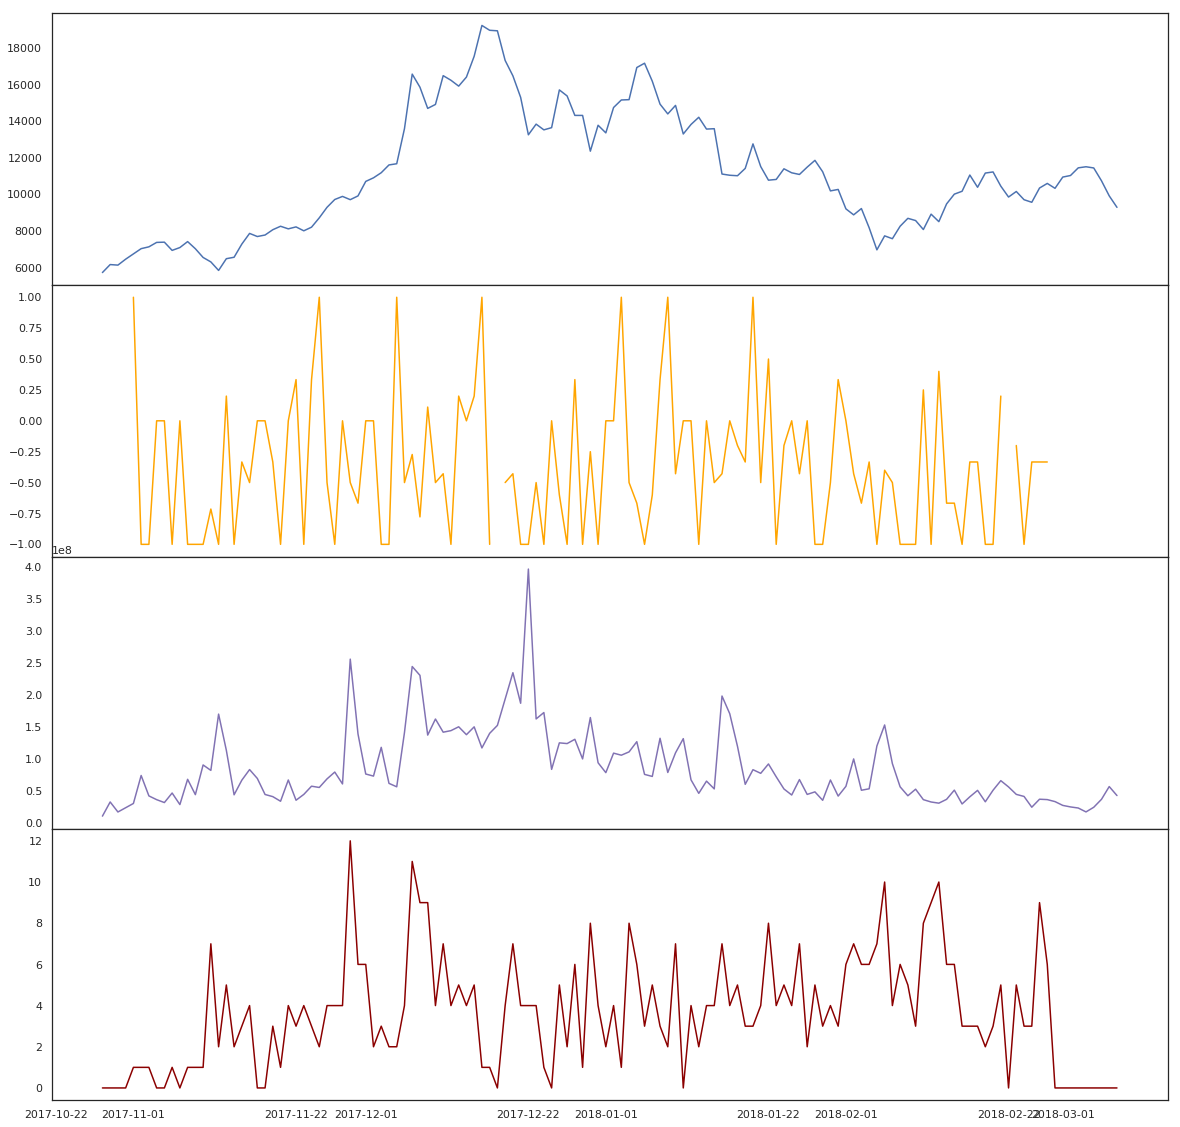

In [105]:
import seaborn as sns
f1, ax = plt.subplots(4,1,sharex=True, figsize=(20, 20))
f1.subplots_adjust(hspace=0)

#df_coin['PvsN']=df_coin["positive"]-df_coin["negative"]
#df_coin['ema_13']=df_coin.PvsN.ewm(span=5, adjust=False).mean()

ax[0].plot(df_coin["timestamp"][:132],df_coin["close"][:132])
ax[1].plot(df_coin["timestamp"][:132],df_coin["positive"][:132]-df_coin["negative"][:132],color='orange')
#ax[1].plot(df_coin["timestamp"][:132],df_coin["ema_13"][:132],color='m')
ax[2].plot(df_coin["timestamp"][:132],df_coin["volumeto"][:132],color='m')
ax[3].plot(df_coin["timestamp"][:132],df_coin["samples"][:132],color='darkred')

#ax[2].bar(df_coin["timestamp"][:132],df_coin["positive"][:132],color='lightgreen')
#ax[2].bar(df_coin["timestamp"][:132],-df_coin["negative"][:132],color='salmon')

#for i in range(len(df_coin['close'])):
#  if df_coin['samples'][i] >= 5 and df_coin['positive'][i] >= 0.60:
#    ax[2].bar(df_coin["timestamp"][i],df_coin["positive"][i],color='green')
#  if df_coin['samples'][i] >= 5 and df_coin['negative'][i] >= 0.60:
#    ax[2].bar(df_coin["timestamp"][i],-df_coin["negative"][i],color='red')   
#sns.set(style="white")



plt.show()


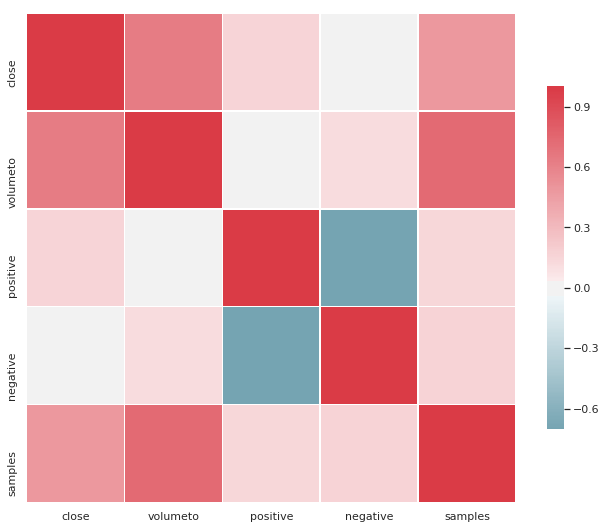

In [106]:
correlation = df_coin.corr()
#cor

sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(correlation, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.show()
